# Exercícios da aula 01

CRÉDITOS: Ativiades de Andresa Bicudo e Leonardo Malta - Robótica 2020.2

Nota: estes exercícios não deverão ser entregues diretamentem

Mas haverá exercícios baseados nestes a entregar

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.2.0 


## Funções úteis

In [2]:
def plot_hists(img, plt):
    """
        Plota o histograma de cada um dos canais RGB
        img - imagem RGB
        plt - objeto matplotlib
    """
    plt.figure(figsize=(20,10)); 
    img_h = img[:,:,0]
    img_s = img[:,:,1]
    img_v = img[:,:,2]
    histo_plot(img_h, "r","R", plt);
    histo_plot(img_s, "g","G", plt);
    histo_plot(img_v, "b","B", plt);

def make_hist(img_255, c, label, plt):
    """ img_255 - uma imagem com 3 canais de 0 até 255
        c a cor do plot
        label - o label do gráfico
        plt - matplotlib.pyplot
    """
    hist,bins = np.histogram(img_255.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    # plt.plot(cdf_normalized, color = c)
    plt.hist(img_255.flatten(),256,[0,256], color = c)
    plt.xlim([0,256])
    plt.legend(label, loc = 'upper left')
    plt.plot()

def histo_plot(img, cor, label, plt):
    """
        img - imagem
        cor - cor
        plt - matplotlib.pyplot object

    """
    plt.figure(figsize=(10,5))
    make_hist(img, cor, label, plt)
    plt.show()
    plt.figure(figsize=(10,5))
    plt.imshow(img, cmap="Greys_r")#, vmin=0, vmax=255)    
    plt.title(label)

# Equalização de histograma

In [3]:
rintin = cv2.imread("RinTinTin.jpg")

In [4]:
rintin.shape

(240, 320, 3)

In [5]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [6]:
rintin_gray.shape

(240, 320)

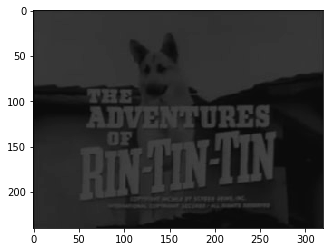

In [7]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

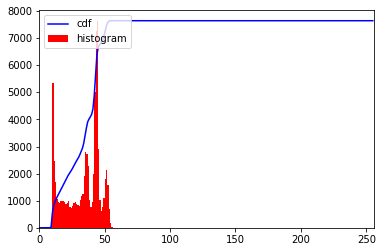

In [8]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

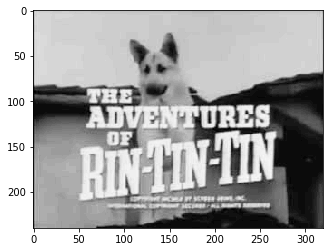

In [9]:
# pontos: (menor, 0); (maior, 255)
# y - y0 = m(x - xo)
def correcao_imagem(imagem):
    nova_imagem = imagem.copy()
    menor = nova_imagem.flatten().min()
    maior = nova_imagem.flatten().max()
    m = 255 / (maior - menor)
    for i in range(len(nova_imagem)):
        for p in range(len(nova_imagem[i])):
            nova_imagem[i][p] = m*nova_imagem[i][p] - m*menor
    
    plt.imshow(nova_imagem, cmap="Greys_r", vmin=0, vmax=255)
    
correcao_imagem(rintin_gray)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


<Figure size 1440x720 with 0 Axes>

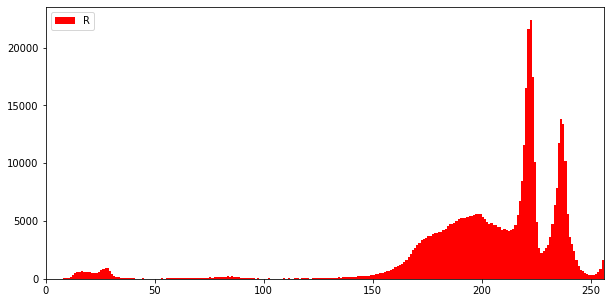

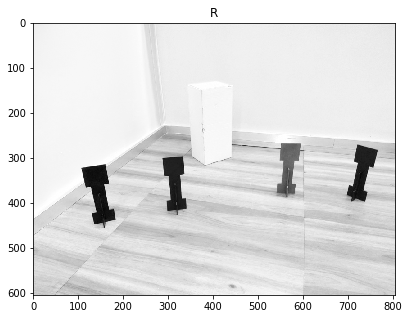

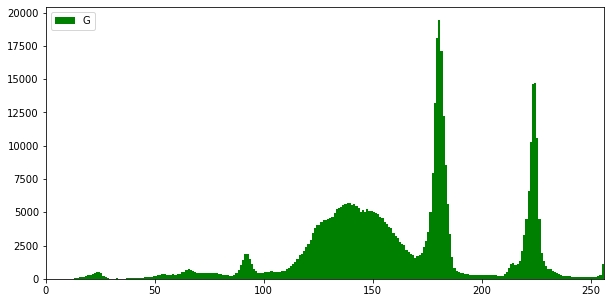

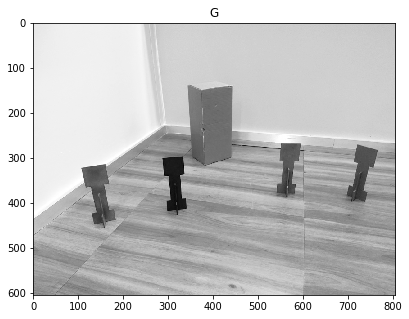

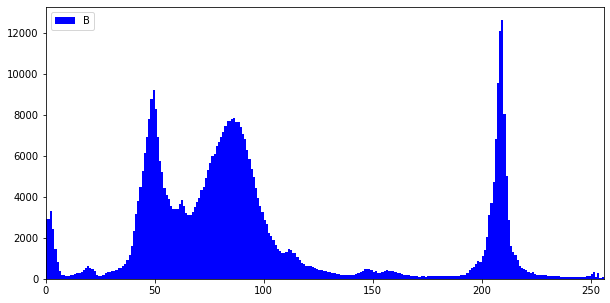

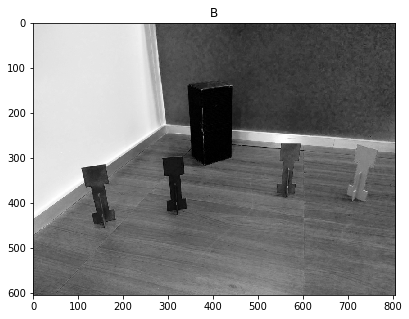

In [10]:
cena = cv2.imread("cena_canto_sala.jpg")
cena = cv2.cvtColor(cena, cv2.COLOR_BGR2RGB)
plot_hists(cena, plt)


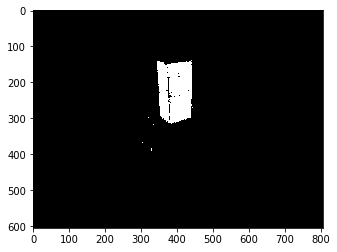

In [11]:
cena_b = cena[:, :, 2]
for i in range(len(cena_b)):
    for p in range(len(cena_b[i])):
        if cena_b[i][p] < 8:
            cena_b[i][p] = 255
        else:
            cena_b[i][p] = 0
            
plt.imshow(cena_b, cmap="Greys_r", vmin=0, vmax=255)

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

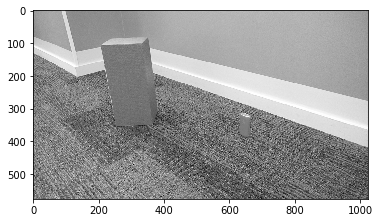

In [13]:
hall_box = cv2.imread("hall_box_battery_atividade3.png")
gray = cv2.cvtColor(hall_box, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="Greys_r")

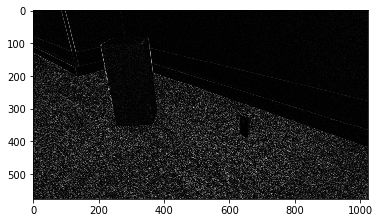

In [14]:
# Horizontal
atividade3 = gray.copy()
for i in range(gray.shape[0]):
    for p in range(1, gray.shape[1] - 1):
        atividade3[i][p] = abs(int(gray[i][p+1]) - int(gray[i][p-1]))
        
plt.imshow(atividade3, cmap="Greys_r")

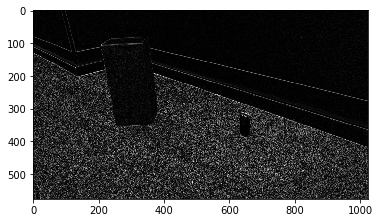

In [15]:
# Vertical
atividade3_2 = gray.copy()

for i in range(1,gray.shape[0] - 1):
    for p in range(gray.shape[1]):
        atividade3_2[i][p] = abs(int(gray[i+1][p]) - int(gray[i-1][p]))
            
plt.imshow(atividade3_2, cmap="Greys_r")